tokenization
stop word remove
vectorization
nlp

In [7]:
import spacy
import torch
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('/content/fake_reviews_dataset.csv', engine='python', on_bad_lines='skip')

In [38]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
10313,Electronics_5,5.0,CG,"I can't compare this against other ones, but i..."
10314,Electronics_5,5.0,OR,My artist daughter ALWAYS uses this glove when...
10315,Electronics_5,5.0,OR,"This keyboard is very nice. It is sleek, heavy..."
10316,Electronics_5,5.0,OR,Bought this to supplement a Baby camera (DCS-8...


In [13]:
display(df.head())

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [18]:
import spacy

# Load the English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading en_core_web_sm model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Get the first review text
first_review_text = df['text_'].iloc[0]

# Process the text with spaCy
doc = nlp(first_review_text)

# Print the tokens
print("Original text:", first_review_text)
print("Tokens:")
for token in doc:
    print(f"- {token.text}")

Original text: Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
Tokens:
- Love
- this
- !
-  
- Well
- made
- ,
- sturdy
- ,
- and
- very
- comfortable
- .
-  
- I
- love
- it!Very
- pretty


In [33]:
print(df.columns)

Index(['category', 'rating', 'label', 'text_', 'tokenized_text',
       'text_without_stopwords', 'text_joined'],
      dtype='object')


In [35]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5'],
      dtype=object)

In [20]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokenized_text'] = df['text_'].apply(tokenize_text)

print("DataFrame with 'tokenized_text' column:")
display(df.head())

DataFrame with 'tokenized_text' column:


,category,rating,label,text_,tokenized_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","[Love, this, !, , Well, made, ,, sturdy, ,, a..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","[love, it, ,, a, great, upgrade, from, the, or..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,"[This, pillow, saved, my, back, ., I, love, th..."
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","[Missing, information, on, how, to, use, it, ,..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,"[Very, nice, set, ., Good, quality, ., We, hav..."


In [21]:
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in nlp.Defaults.stop_words and token.isalpha()]

df['text_without_stopwords'] = df['tokenized_text'].apply(remove_stopwords)

print("DataFrame with 'text_without_stopwords' column:")
display(df.head())

DataFrame with 'text_without_stopwords' column:


,category,rating,label,text_,tokenized_text,text_without_stopwords
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","[Love, this, !, , Well, made, ,, sturdy, ,, a...","[Love, sturdy, comfortable, love, pretty]"
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","[love, it, ,, a, great, upgrade, from, the, or...","[love, great, upgrade, original, couple, years]"
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,"[This, pillow, saved, my, back, ., I, love, th...","[pillow, saved, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","[Missing, information, on, how, to, use, it, ,...","[Missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,"[Very, nice, set, ., Good, quality, ., We, hav...","[nice, set, Good, quality, set, months]"


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into strings for TF-IDF Vectorizer
df['text_joined'] = df['text_without_stopwords'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer with max_features=5000
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_joined'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF feature matrix:", tfidf_matrix.shape)

Shape of TF-IDF feature matrix: (10318, 5000)


In [25]:
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()
print("First 20 terms in the TF-IDF vocabulary:")
print(tfidf_vocabulary[:20])

First 20 terms in the TF-IDF vocabulary:
['aa' 'ab' 'ability' 'able' 'abrasive' 'abs' 'absolute' 'absolutely'
 'absorb' 'absorbed' 'absorbent' 'absorbs' 'abuse' 'ac' 'accent' 'accents'
 'accept' 'access' 'accessible' 'accessories']


In [26]:
X = tfidf_matrix
y = df['category']

print("Shape of feature matrix X:", X.shape)
print("Number of unique categories in y:", y.nunique())

Shape of feature matrix X: (10318, 5000)
Number of unique categories in y: 3


In [27]:
X = X.toarray()
print("Shape of dense feature matrix X:", X.shape)

Shape of dense feature matrix X: (10318, 5000)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7222, 5000)
Shape of X_test: (3096, 5000)
Shape of y_train: (7222,)
Shape of y_test: (3096,)


In [29]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Use 'liblinear' solver for multiclass classification on smaller datasets or 'lbfgs' for larger ones.
# Set max_iter for convergence and random_state for reproducibility.
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [30]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


Accuracy: 0.8107

Classification Report:
                       precision    recall  f1-score   support

        Electronics_5       0.86      0.71      0.78       677
   Home_and_Kitchen_5       0.80      0.85      0.83      1228
Sports_and_Outdoors_5       0.80      0.82      0.81      1191

             accuracy                           0.81      3096
            macro avg       0.82      0.80      0.81      3096
         weighted avg       0.81      0.81      0.81      3096



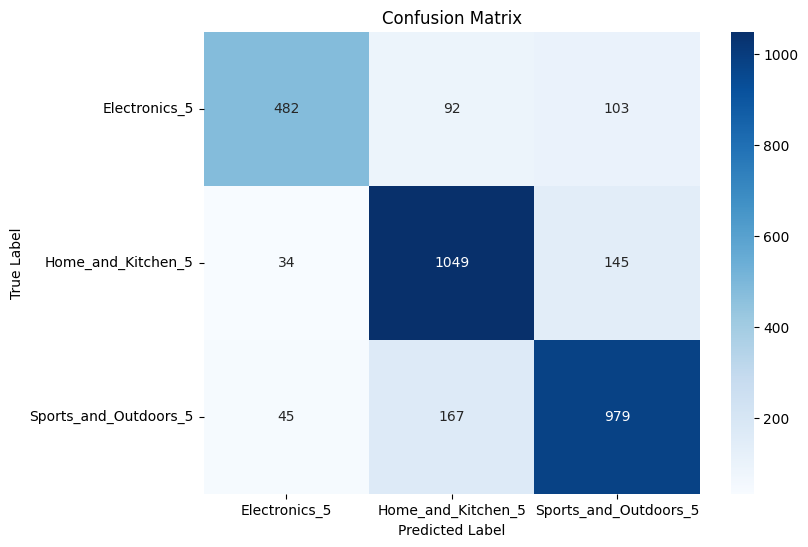

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels for better visualization
class_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [41]:
import pandas as pd
df_new = pd.read_csv('/content/fake_reviews_dataset.csv', engine='python', on_bad_lines='skip')
print("Successfully loaded '/content/fake_reviews_dataset.csv' into df_new.")
display(df_new.head())
df_new.shape

Successfully loaded '/content/fake_reviews_dataset.csv' into df_new.


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


(10318, 4)

Task 2

In [42]:
df['binary_label'] = df['label'].map({'CG': 1, 'OR': 0})
display(df.head())
print("Value counts for 'binary_label':")
print(df['binary_label'].value_counts())

,category,rating,label,text_,binary_label
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,1


Value counts for 'binary_label':
binary_label
1    5163
0    5155
Name: count, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, df['binary_label'], test_size=0.3, random_state=42)

print("Shape of X_train_binary:", X_train_binary.shape)
print("Shape of X_test_binary:", X_test_binary.shape)
print("Shape of y_train_binary:", y_train_binary.shape)
print("Shape of y_test_binary:", y_test_binary.shape)

Shape of X_train_binary: (7222, 5000)
Shape of X_test_binary: (3096, 5000)
Shape of y_train_binary: (7222,)
Shape of y_test_binary: (3096,)


In [44]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model for binary classification
binary_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Fit the model to the binary training data
binary_model.fit(X_train_binary, y_train_binary)

print("Binary Logistic Regression model trained successfully.")

Binary Logistic Regression model trained successfully.


In [45]:
y_pred_binary = binary_model.predict(X_test_binary)
print("Predictions made on the binary test set.")

Predictions made on the binary test set.


Binary Classification Accuracy: 0.8456

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1547
           1       0.87      0.81      0.84      1549

    accuracy                           0.85      3096
   macro avg       0.85      0.85      0.85      3096
weighted avg       0.85      0.85      0.85      3096



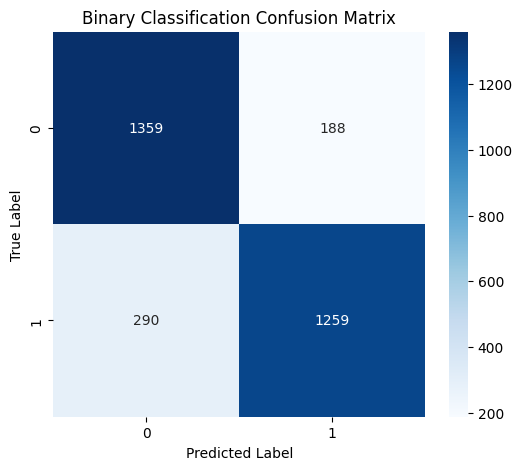

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy for binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Binary Classification Accuracy: {binary_accuracy:.4f}\n")

# Generate classification report for binary classification
binary_report = classification_report(y_test_binary, y_pred_binary)
print("Binary Classification Report:")
print(binary_report)

# Generate confusion matrix for binary classification
binary_cm = confusion_matrix(y_test_binary, y_pred_binary)

# Get unique class labels for better visualization (0 and 1 for binary)
binary_class_labels = sorted(y_test_binary.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(binary_cm, annot=True, fmt="d", cmap="Blues", xticklabels=binary_class_labels, yticklabels=binary_class_labels)
plt.title("Binary Classification Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Task 3

In [49]:
categorical_fake_reviews = df.groupby(['category', 'binary_label']).size().unstack(fill_value=0)
display(categorical_fake_reviews)
print("0: Genuine Review, 1: Fake Review")

binary_label,0,1
category,,
Electronics_5,1154,1162
Home_and_Kitchen_5,2028,2028
Sports_and_Outdoors_5,1973,1973


0: Genuine Review, 1: Fake Review


In [47]:
import pandas as pd

# 1. Extract coefficients from the trained binary_model
# For binary classification, coef_ will be a 2D array (1, n_features). We need the first (and only) row.
coefficients = binary_model.coef_[0]

# 2. Create a Pandas Series mapping words to their coefficients
# Ensure that the length of coefficients matches the length of tfidf_vocabulary
if len(coefficients) == len(tfidf_vocabulary):
    feature_importance = pd.Series(coefficients, index=tfidf_vocabulary)
else:
    raise ValueError("Mismatch between coefficients and vocabulary size.")

# 3. Sort the Series in descending order to get the most influential words for the positive class (fake review = 1)
top_influential_words = feature_importance.sort_values(ascending=False)

# 4. Display the top N (e.g., 20) words with the highest positive coefficients
N = 20
print(f"Top {N} most influential words for fake reviews (binary_label = 1):")
print(top_influential_words.head(N))

Top 20 most influential words for fake reviews (binary_label = 1):
problem        5.308595
reason         4.560645
couple         4.434208
small          3.993397
downside       3.901139
large          3.713921
materials      3.668224
wide           3.553061
friend         3.412464
replace        3.343748
plastic        3.315998
fan            3.099351
comfortable    2.967630
little         2.955137
fact           2.702978
quality        2.612354
strong         2.548423
bought         2.402847
gave           2.368368
fix            2.307127
dtype: float64


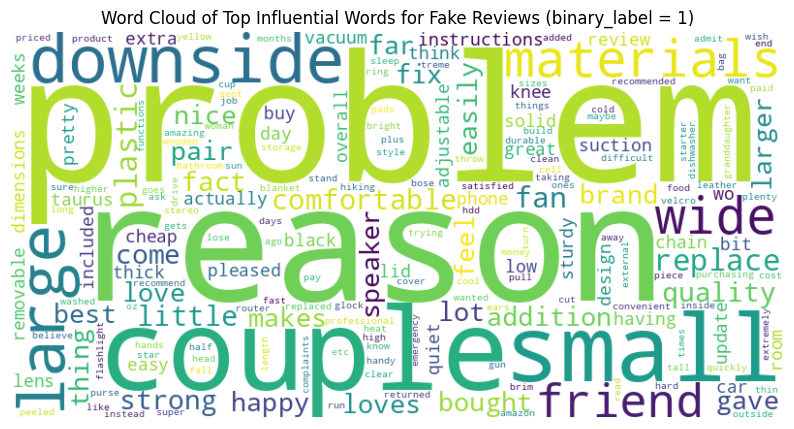

Word cloud generated successfully.


In [48]:
try:
    from wordcloud import WordCloud
except ImportError:
    print("Installing wordcloud library...")
    !pip install wordcloud
    from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Convert the top_influential_words Series into a dictionary with absolute coefficient values
# This is because coefficients can be negative, but word cloud needs positive frequencies.
word_freq = {word: abs(score) for word, score in top_influential_words.items()}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Influential Words for Fake Reviews (binary_label = 1)')
plt.show()

print("Word cloud generated successfully.")